<!-- metadata: title -->
# Kenya Unit Trusts: Money Market Fund(KES) Analysis

<!-- metadata: subtitle -->
> ### Can Kenyan Money Market Funds gurantee capital preservation? 

<!-- metadata: date, type=date -->
**Published Date:**
2024-03-03

<!-- metadata: date-modified, type=date-->
**Date Modified:**
2024-05-05

<!-- metadata: keywords, type=array -->
**Keywords:**
  - money
  - kenya
  - unit-trusts
  - money-market-funds
  - MMF

<!-- metadata: categories, type=array -->
**Categories:**
  - kenya unit trusts
  - data science
  - money

## Description

<!-- metadata: description -->
Money market is a form of unit trust, where fund managers collect money from the group of investors, and invest on their behave. This reduces the overhead of managing your portfio and significantly reduces your risk. Let's statistically and critically analyze Money market funds in Kenya in general using publicly available information and hopefully paint a clearer picture of the state of unit trusts in Kenya. 

- What are the risk factors that exist? 
- What is the performance of money market funds?

## Abstract

<!-- metadata: abstract -->
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type and scrambled it to make a type specimen book. It has survived not only five centuries, but also the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 1960s with the release of Letraset sheets containing Lorem Ipsum passages, and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum.

## Introduction

In Kenya, a good number of the population have a bank account, even if not the traditional bank account. It is estimated that by year 2029, 99.9% of Kenyans will be banked, ^[Population share with banking account in Kenya 2014-2029
Published by J. Degenhard, Jan 30, 2024. <https://www.statista.com/forecasts/1149636/bank-account-penetration-forecast-in-kenya>]. With increase in financial access, financial literacy and regular individuals will want to venture in the teritory of finantial assets huunting for higher interest rates. One of the most attractive entry level high-yield financial asset is the unit trust, specifically the money market funds. Its easy to start, deposit, withdraw, and its interest is daily compunding, while offering higher interest than any bank.

Unit trusts are required to publish their daily and effective annual yields on the daily newspapers, and thus an investor can therefore always confirm the value of their investment as well as benchmark the performance against other unit trusts. It is also mandatory for the scheme to issue monthly statements showing an investor’s investments position.^[Investing in Unit Trust Funds; 19 May, 2019; see <https://cytonn.com/topicals/investing-in-unit-1>]^[Publishing daily the price of units in at least two daily newspapers of national circulation,
in English. <https://cma.or.ke/wp-content/uploads/2023/03/CMA-Handbook-2021.pdf> ]

Unit Trust is required to have at least three trustees, ^[sshttps://cma.or.ke/wp-content/uploads/2023/03/CMA-Handbook-2021.pdf]

^[https://www.google.com/search?q=unit+trusts+are+mandated+to+inform+customers+of+yileds+CMA&sca_esv=d7f5b94d2e0e1e85&sca_upv=1&rlz=1C5GCEM_en&sxsrf=ADLYWIIy4tzw-iKWAAcD-6cN8riYTbVjdA%3A1720446046799&ei=XuyLZqa8MLSOxc8Pw42giA4&ved=0ahUKEwim4-X7yJeHAxU0R_EDHcMGCOEQ4dUDCA8&uact=5&oq=unit+trusts+are+mandated+to+inform+customers+of+yileds+CMA&gs_lp=Egxnd3Mtd2l6LXNlcnAiOnVuaXQgdHJ1c3RzIGFyZSBtYW5kYXRlZCB0byBpbmZvcm0gY3VzdG9tZXJzIG9mIHlpbGVkcyBDTUEyBxAhGKABGAoyBxAhGKABGApI1RFQvwFYtw5wAXgBkAEAmAHeAqABlQmqAQUyLTMuMbgBA8gBAPgBAZgCBaACownCAgoQABiwAxjWBBhHwgIFECEYnwWYAwDiAwUSATEgQIgGAZAGCJIHBzEuMC4zLjGgB5cW&sclient=gws-wiz-serpsssss]



## Data

Despite the requirements to have the daily yield published in two national newspapers, it is fairly tasking to find a good data source. Also, since there dont have to publish the newspapers that have digital alternatives, it also becomes difficult to capture all yileds without visiting the library and grabbing the actual physical copies, which makes this task very expesnsive. Again, getting historical data is also not free, most old newspaper records are sold, adding up the cost. Fortunately, since 2014, Cytonn has been doing free makket research, and publishing them at <https://cytonnreport.com/>. A few fund managers publish their daily yields at their websites, but without historical data; just the current day's yield, which effectively makes this data unuseful for analysis.

We settled on crawling and analysing the massive cytton research data that is publicly available since 2014. With over 600 reports with, crawl each of the reports in a way that doesnt break their systems, or deny others the service, extract the table, aggregate the table results and analyze the tables. We checked with Cytonn's terms of service. users are allowed to use their copyright data in accordance with fair use/dealing, ^[Reproduction is prohibited other than in accordance with the copyright notice, which forms part of these terms and conditions. <https://cytonn.com/terms-of-use> ]. To allow others to reproduce this analysys, we will save a copy of the crawled data for future researchers and data enthusisists.

## Analysis

### Imports

In [1]:
import sys
import os

# Add parent directory to sys.path
root_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(root_dir)

%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from pyppeteer.page import Page
import asyncio
import json
import io
from bs4 import BeautifulSoup, Tag
from urllib.request import urlopen
from pyppeteer.page import Request
from matplotlib import pyplot as plt
from tqdm import tqdm
import re
import webbrowser
from typing import Callable
from copy import copy
from datetime import datetime, timedelta
from python_utils.web_screenshot import web_screenshot_async
from python_utils.get_browser import get_browser_page_async

### Fund Managers

Let's start of by listing all the certified fund mangers in Kenya by CMA.^[Approved Fund Managers by CMA. <https://www.cma.or.ke/licensees-market-players/>]

Lets start with a screenshot of the webpage.

In [ ]:
async def action(page: Page):
    await page.waitForSelector('ul.module-accordion')
    elements = await page.querySelectorAll('li .accordion-title')
    # Iterate through the elements to find the one containing 'FUND MANAGERS'
    for element in elements:
        text_content = await page.evaluate('(element) => element.textContent', element)
        if 'FUND MANAGERS' in text_content:
            # Click on the target element
            await element.click()
            break
    else:
        print('Element not found')
    await page.waitForSelector('li.current.builder-accordion-active')
    await asyncio.sleep(1)

await web_screenshot_async(
    "https://www.cma.or.ke/licensees-market-players/", 
    action = action,
    width=1500)

Let's query the "Fund Managers" table.

In [3]:
url_response = urlopen("https://www.cma.or.ke/licensees-market-players/").read()
fund_managers_html_table = BeautifulSoup(url_response, "html.parser")\
    .find('span', string="FUND MANAGERS")\
        .parent\
            .parent\
                .parent\
                    .find('table')

fund_managers_df = pd.read_html(io.StringIO(str(fund_managers_html_table)))[0].dropna()
fund_managers_df

,NAME,ADDRESS,LICENCE NO.
0,Orient Asset Managers Limited,"P.O. Box 34530-00100, Nairobi",23.0
1,Amana Capital Limited,"P.O. Box 9480-00100, Nairobi",24.0
2,Apollo Asset Management Company Limited,"P.O. Box 30389-00100, Nairobi",25.0
3,Britam Asset Managers (Kenya) Limited,"P.O. Box30375-00100, Nairobi",27.0
4,Metropolitan Canon Asset Managers Limited,"P.O. Box 30216-00100, Nairobi",28.0
5,Nabo Capital Limited,"P.O. Box 10518-00100, Nairobi",29.0
6,CIC Asset Managers Limited,"P.O. Box 59485-00200, Nairobi",30.0
7,Co-op Trust Investment Services Limited,"P.O. Box 48231-00100, Nairobi",31.0
8,FCB Capital Limited,"P.O. Box 26219-00100, Nairobi",32.0
9,Fusion Investment Management Limited,"P.O. Box 47583-00100, Nairobi",33.0


The address of `African Alliance Kenya Asset Management Limited` doesnt seem to be valid, lets populate it with `P.O. Box 27639 Nairobi 00506`

In [4]:
fund_managers_df.loc[fund_managers_df['LICENCE NO.'] == 165, 'ADDRESS'] = 'P.O. Box 27639 Nairobi 00506'
fund_managers_df

,NAME,ADDRESS,LICENCE NO.
0,Orient Asset Managers Limited,"P.O. Box 34530-00100, Nairobi",23.0
1,Amana Capital Limited,"P.O. Box 9480-00100, Nairobi",24.0
2,Apollo Asset Management Company Limited,"P.O. Box 30389-00100, Nairobi",25.0
3,Britam Asset Managers (Kenya) Limited,"P.O. Box30375-00100, Nairobi",27.0
4,Metropolitan Canon Asset Managers Limited,"P.O. Box 30216-00100, Nairobi",28.0
5,Nabo Capital Limited,"P.O. Box 10518-00100, Nairobi",29.0
6,CIC Asset Managers Limited,"P.O. Box 59485-00200, Nairobi",30.0
7,Co-op Trust Investment Services Limited,"P.O. Box 48231-00100, Nairobi",31.0
8,FCB Capital Limited,"P.O. Box 26219-00100, Nairobi",32.0
9,Fusion Investment Management Limited,"P.O. Box 47583-00100, Nairobi",33.0


### Add Columns

- Location Coordinates (and google map)
- Headquter location/address/country
- Launch Date
- Risk Profile
- Trustee
- Custodian
- Auditors
- Minimum Investment
- Minimum Additional Investment
- Initial Fee
- Annual Management Fee
- Distribution
- Asset Under Management/Market share
- Advertised Rate [Gross, Net]
- Duration to withdraw
- Security - joint account verification/validation
- has online portal
- Withdraw chargessssss
- Contacts
- where are the daily yileds published!

https://cytonnreport.com/research/cmmf-fact-sheet-june-2021

https://cytonnreport.com/research/cmmf-fact-sheet-may-2021

https://cytonnreport.com/research/cmmf-fact-sheet-april-2021

https://ke.cicinsurancegroup.com/mmf/

https://ke.britam.com/save-and-invest/business/invest/unit-trust-funds/unit-trusts


TAKE NOTE OF USD MMF
TAKE NOTE OF MERGED OBSOLTELE MANAGERS, EG ALPHA/KASHA NPW ORIENT

### Getting the Perormance

According to Capital Markets Authority, fund managers are required to publish their yields daily in a reputable newspaper. What this means accessing hostorical records requires a significant investment in time to collect, aggregate and validate the published yields. That not withstanding, two very important questions become obvious:
 - what is a reputbale newspaper? 
 - what yield do they publish, gross or net?
 - What picture does an anualized daily rate paint?
 - Is interest deffered or carried forward (reporting a convervative figure and retaining the rest for rainy day to preserve a picture of good performance)?

Luckily, one of the fund managers, one that has recently found its self in the courts far more often than it would have wished, does exelent investment and market research. It has a good-enough aggregate of fund managers and their performance weekly and monthly. We are going to crawl their data for analysis, and analyze it for manipulation.If the data comeout clean, we will analyze the trend of fund managers using the data.

### Cytton Research

We are going to crawl the data from cytonn research, https://cytonn.com/researches/categories/1

#### screen shots

Lests start with a view of weekly reports

In [ ]:
await web_screenshot_async(
    "https://cytonn.com/researches/categories/1",
    width=1000)

Here is the latest report

In [ ]:
await web_screenshot_async(
    "https://cytonnreport.com/research/cytonn-h12024-markets",
    width=1000)

In [ ]:
"Hello, {name}! You are {age} years old.".format(name='charles', age='10')

Instead of directly crawling HTML from https://cytonn.com/researches/ page, we can instead crawl JSON from https://cytonnreport.com/research page, using the link https://cytonnreport.com/get/allreports.

In [5]:
async def get_all_cytonn_reports(per_page_count: int = 10):
    page, browser = await get_browser_page_async()
    reports_url = "https://cytonnreport.com/get/allreports"
    reports_headers: dict = None
    reports_method: str = None
    async def catch_request(request: Request):
        nonlocal reports_headers
        nonlocal reports_method
        if request.url == reports_url:
            reports_headers = request.headers.copy()
            reports_method = request.method
            await request.continue_()
        else:
            await request.continue_()
    async def get_cytonn_reports(current_page: int):
        javascript_fetch_fn = f'''
            async () => {{
                try {{
                    const response = await fetch(
                        "{reports_url}", 
                        {{
                            "headers": {json.dumps(reports_headers)},
                            "method": "{reports_method}",
                            "body": {json.dumps(json.dumps(
                                {
                                    "pagination": {
                                        "per_page": per_page_count, 
                                        "current_page": current_page
                                    }
                                }))},
                            "referrer": "https://cytonnreport.com/research",
                            "referrerPolicy": "no-referrer-when-downgrade",
                            "mode": "cors",
                            "credentials": "include"
                        }});
                    if (!response.ok) {{
                        throw new Error(`HTTP error! status: ${{response.status}}`);
                    }}
                    const json = await response.json();
                    return json;
                }} catch (error) {{
                    console.error('Fetch error:', error);
                    throw error; // Re-throw to allow calling code to handle it
                }}
            }}
        '''
        response_json = await page.evaluate(javascript_fetch_fn)
        return response_json
    # Enable request interception
    await page.setRequestInterception(True)
    # Attach the request handler
    page.on('request', lambda request: asyncio.ensure_future(catch_request(request)))
    # Navigate to the desired URL
    await page.goto("https://cytonnreport.com/research")
    while not reports_headers:
        await asyncio.sleep(1)
    current_page = 1
    all_reports = []
    pbar: tqdm = None
    while True:
        reports_response = await get_cytonn_reports(current_page)
        reports = reports_response['data'] if reports_response else []
        if len(reports) > 0:
            total = reports_response['total']
            pbar = pbar or tqdm(total=total)
            pbar.update(len(reports))
            all_reports.extend(reports)
            last_page = reports_response['last_page']
            if last_page == current_page:
                break
            current_page += 1
        else:
            break
        await asyncio.sleep(0.5)
    await browser.close()
    if pbar:
        pbar.close()
    return all_reports

all_cytonn_reports = await get_all_cytonn_reports()
print(f'There are {len(all_cytonn_reports)} reports')

100%|██████████| 640/640 [02:38<00:00,  4.03it/s]

There are 640 reports


In [6]:
# https://charanhu.medium.com/converting-pandas-dataframe-into-a-dataset-and-pushing-to-hugging-face-146e2ccac38d
all_cytonn_reports_df = pd.DataFrame(all_cytonn_reports)
# with pd.option_context(
#   'display.max_columns', None, 
#   'display.max_colwidth', 100):
#   display(all_cytonn_reports_df)
all_cytonn_reports_df

,id,slug,name,author,researchdate,active,created_by,series_id,campaign,sent,...,title,category,summary,body,date_holder,date,creator,status,series,topics
0,722,kenya-retail-report,"Kenya Retail Report 2024, & Cytonn Weekly #29/...",Research team,2024-07-21,1,94,1,2317,1,...,"Kenya Retail Report 2024, & Cytonn Weekly #29/...",Investment Reports,"<p><strong>Money Markets, T-Bills Primary Auct...","<p><strong>Money Markets, T-Bills Primary Auct...",21,"21 July, 2024",Chelsea Nyakundi,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 2417, 'name': 'Fixed Income', 'slug': ..."
1,721,special-interest-group,"Special Interest Group Funds in Kenya, & Cyton...",Research Team,2024-07-14,1,97,1,2308,1,...,"Special Interest Group Funds in Kenya, & Cyton...",Investment Reports,<p><strong>Investment Updates:</strong></p>\r\...,<p><strong>Investment Updates:</strong></p>\r\...,14,"14 July, 2024",Ian Kaire,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 2412, 'name': 'Company updates', 'slug..."
2,720,kenyas-fy2024-2025-budget,"Kenya’s FY’2024/2025 Budget Review, & Cytonn W...",Research Team,2024-07-07,1,95,1,2279,1,...,"Kenya’s FY’2024/2025 Budget Review, & Cytonn W...",Investment Reports,"<p><strong>Money Markets, T-Bills Primary Auct...","<p><strong>Money Markets, T-Bills Primary Auct...",7,"7 July, 2024",Fredrick Maore,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 2407, 'name': 'Fixed Income', 'slug': ..."
3,719,cytonn-h12024-markets,Cytonn H1’2024 Markets Review,Research Team,2024-06-30,1,93,1,2258,1,...,Cytonn H1’2024 Markets Review,Investment Reports,<p><strong>Global Economic Growth: </strong></...,<p><strong>Global Economic Growth: </strong></...,30,"30 June, 2024",Erick Kariuki,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 2400, 'name': 'Global Markets Review',..."
4,718,kenya-fy2023-insurance,"Kenya FY’2023 Insurance Report, & Cytonn Weekl...",Research Team,2024-06-23,1,92,1,2243,1,...,"Kenya FY’2023 Insurance Report, & Cytonn Weekl...",Investment Reports,<p><strong>Investment Updates:</strong></p>\r\...,<p><strong>Investment Updates:</strong></p>\r\...,23,"23 June, 2024",Edna Dande,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 2395, 'name': 'Company updates', 'slug..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,4,update-nov-21-2014,Cytonn Weekly Update,Shiv Arora,2014-11-21,1,1,1,None,0,...,Cytonn Weekly Update,Investment Reports,<h3>Kenya Market Update &amp; Outlook?\n</h3>\...,<h3>Kenya Market Update &amp; Outlook?\n</h3>\...,21,"21 November, 2014",Cytonn Research Team,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 4, 'name': 'Cytonn Weekly', 'slug': 'u..."
636,3,update-nov-7-2014,Cytonn Weekly Update,Shiv Arora,2014-11-07,1,1,1,None,0,...,Cytonn Weekly Update,Investment Reports,<h3>Kenya Market Update &amp; Outlook?</h3>\n\...,<h3>Kenya Market Update &amp; Outlook?</h3>\n\...,7,"7 November, 2014",Cytonn Research Team,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 3, 'name': 'Cytonn Weekly', 'slug': 'u..."
637,2,update-oct-24-2014,Cytonn Weekly Update,Shiv Arora,2014-10-24,1,1,1,None,0,...,Cytonn Weekly Update,Investment Reports,<h3>Kenya Market Update &amp; Outlook</h3>\n\n...,<h3>Kenya Market Update &amp; Outlook</h3>\n\n...,24,"24 October, 2014",Cytonn Research Team,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 2, 'name': 'Cytonn Weekly', 'slug': 'u..."
638,1,rebasing-of-kenyas-gdp,Rebasing of Kenya's GDP,Shiv Arora,2014-10-17,1,1,1,None,0,...,Rebasing of Kenya's GDP,Investment Reports,<h3>What happened during Kenya?s rebasing?</h3...,<h3>What happened during Kenya?s rebasing?</h3...,17,"17 October, 2014",Cytonn Research Team,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 1, 'name': 'Cytonn Weekly', 'slug': 'r..."


In [7]:
all_cytonn_reports_df.iloc[0]

id                                                                722
slug                                              kenya-retail-report
name                Kenya Retail Report 2024, & Cytonn Weekly #29/...
author                                                  Research team
researchdate                                               2024-07-21
active                                                              1
created_by                                                         94
series_id                                                           1
campaign                                                         2317
sent                                                                1
thumbnail                                                        None
created_at                                        2024-07-21 13:58:09
meta_title                                                       None
meta_keywords                                                    None
meta_description    

In [8]:
all_cytonn_reports_df.columns

Index(['id', 'slug', 'name', 'author', 'researchdate', 'active', 'created_by',
       'series_id', 'campaign', 'sent', 'thumbnail', 'created_at',
       'meta_title', 'meta_keywords', 'meta_description', 'og_description',
       'url', 'og_image', 'updated_at', 'deleted_at', 'title', 'category',
       'summary', 'body', 'date_holder', 'date', 'creator', 'status', 'series',
       'topics'],
      dtype='object')

In [9]:
def parse_grouped_dates(date_string: str):
    pattern = r"^(FY|Q[1-4]|H[1-2])'(\d{4})$"
    match = re.match(pattern, date_string, re.IGNORECASE)
    if not match:
        return None
    period, year = match.groups()
    year = int(year)
    if period.upper() == 'FY':
        start_date = datetime(year, 1, 1)
        end_date = datetime(year, 12, 31)
    elif period.upper().startswith('Q'):
        quarter = int(period[1])
        start_month = (quarter - 1) * 3 + 1
        start_date = datetime(year, start_month, 1)
        end_date = start_date.replace(month=start_month + 2) + timedelta(days=32)
        end_date = end_date.replace(day=1) - timedelta(days=1)
    elif period.upper().startswith('H'):
        half = int(period[1])
        start_month = (half - 1) * 6 + 1
        start_date = datetime(year, start_month, 1)
        end_date = start_date.replace(month=start_month + 5) + timedelta(days=32)
        end_date = end_date.replace(day=1) - timedelta(days=1)
    return (start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))

# Test the function
test_dates = ["FY'2019", "Q1'2020", "H1'2019", "fy'2018", "q3'2021", "h2'2022"]

for expanding_value in test_dates:
    result = parse_grouped_dates(expanding_value)
    if result:
        print(f"{expanding_value}: {result}")
    else:
        print(f"{expanding_value}: Invalid format")

FY'2019: ('2019-01-01', '2019-12-31')
Q1'2020: ('2020-01-01', '2020-03-31')
H1'2019: ('2019-01-01', '2019-06-30')
fy'2018: ('2018-01-01', '2018-12-31')
q3'2021: ('2021-07-01', '2021-09-30')
h2'2022: ('2022-07-01', '2022-12-31')


In [32]:
fund_manager_maps = [
    # (['etica'], 'Etica Capital Limited'),
    # (['lofty-corban'], 'Lofty-Corban Investments Limited'),
    # (['genafrica'], 'GenAfrica Asset Managers Limited'),
    # (['nabo'], 'Nabo Capital Limited'),
    # (['cytonn'], 'Cytonn Asset Managers Limited'),
    # (['apollo'], 'Apollo Asset Management Company Limited'),
    # (['kuza'], 'Kuza Asset Management Limited'),
    # (['enwealth'], 'Enwealth Money Market Fund'),
    # (['madison'], 'Madison Investment Managers Limited'),
    # (['co-op'], 'Co-op Trust Investment Services Limited'),
    # (['sanlam'], 'Sanlam Investments East Africa Limited'),
    # (['gencap', 'imara'], 'GenCap Hela Imara Money Market Fund'),
    # (['mayfair'], 'Mayfair Asset Managers Limited'),
    # (['aa'], 'AA kenya shillings fund'),
    # (['jubilee'], 'Jubilee Financial Services Limited'),
    # (['orient', 'kasha', 'alpha', 'alphafrica'], 'Orient Asset Managers Limited'), # 'Alpha Africa Asset Managers'
    # (['mutual', 'old'], 'Old Mutual Investment Group'),
    # (['absa'], 'ABSA Asset Management Limited'),
    # (['dry'], 'Dry Associates Money Market Fund'),
    # (['kcb', 'natbank'], 'KCB Asset Management Limited (formerly Natbank Trustee and Investment Services Limited)'),
    # (['cic'], 'CIC Asset Managers Limited'),
    # (['icea'], 'ICEA Asset Lion Asset Management Limited'),
    # (['equity'], 'Equity money market fund'),
    # (['mali'], 'Mali Money Market Fund'),
    # (['britam', 'british-american', 'british', 'american'], 'Britam Asset Managers (Kenya) Limited'),
    # (['zimele'], 'Zimele Asset Management Company Limited'),
    # (['ncba'], 'NCBA Unit Trust Scheme'),
    # (['genghis'], 'Genghis Unit Trust Fund'),
    # (['commercial'], 'Commercial Bank of Africa'),
    # (['alliance'], 'African Alliance Kenya'),
    # (['stanlib'], 'Stanlib Kenya'),
    # (['amana'], 'Amana Capital Limited'),
    # # (['alpha', 'alphafrica'], 'Alpha Africa Asset Managers'),
    # (['arvocap'], 'Arvocap Money Market Fund'),
    # (['madisson'], 'Madisson Money Market Fund'),
    # (['wanafunzi'], 'Wanafunzi Investments')
    (['orient', 'kasha', 'alpha', 'alphafrica'], 'Orient Asset Managers Limited'),
    (['amana'], 'Amana Capital Limited'),
    (['apollo'], 'Apollo Asset Management Company Limited'),
    (['britam', 'british-american', 'british', 'american'], 'Britam Asset Managers (Kenya) Limited'),
    (['metropolitan'], 'Metropolitan Canon Asset Managers Limited'),
    (['nabo'], 'Nabo Capital Limited'),
    (['cic'], 'CIC Asset Managers Limited'),
    (['co-op'], 'Co-op Trust Investment Services Limited'),
    (['fcb'], 'FCB Capital Limited'),
    (['fusion'], 'Fusion Investment Management Limited'),
    (['genafrica'], 'GenAfrica Asset Managers Limited'),
    (['icea'], 'ICEA Asset Lion Asset Management Limited'),
    (['madison'], 'Madison Investment Managers Limited'),
    (['mutual', 'old'], 'Old Mutual Investment Group'),
    (['sanlam'], 'Sanlam Investments East Africa Limited'),
    (['standard'], 'Standard Chartered Investment Services Limited'),
    (['zimele'], 'Zimele Asset Management Company Limited'),
    (['kcb', 'natbank'], 'KCB Asset Management Limited'), # (formerly Natbank Trustee and Investment Services Limited)
    (['cytonn'], 'Cytonn Asset Managers Limited'),
    (['altree'], 'Altree Capital Kenya Limited'),
    (['jubilee'], 'Jubilee Financial Services Limited'),
    (['absa'], 'ABSA Asset Management Limited'),
    (['african'], 'African Diaspora Asset Managers Limited'),
    (['cfs'], 'CFS Asset Management Limited'),
    (['i&m'], 'I&M Capital Limited'),
    (['globetec'], 'Globetec Asset Managers Limited'),
    (['african'], 'African Alliance Kenya Asset Management Limited'),
    (['cpf'], 'CPF Financial Services Limited'),
    (['kuza'], 'Kuza Asset Management Limited'),
    (['waanzilishi'], 'Waanzilishi Capital Limited'),
    (['mayfair'], 'Mayfair Asset Managers Limited'),
    (['etica'], 'Etica Capital Limited'),
    (['star'], 'Star Capital Management Limited'),
    (['lofty-corban'], 'Lofty-Corban Investments Limited')
]
fund_manager_maps

[(['orient', 'kasha', 'alpha', 'alphafrica'], 'Orient Asset Managers Limited'),
 (['amana'], 'Amana Capital Limited'),
 (['apollo'], 'Apollo Asset Management Company Limited'),
 (['britam', 'british-american', 'british', 'american'],
  'Britam Asset Managers (Kenya) Limited'),
 (['metropolitan'], 'Metropolitan Canon Asset Managers Limited'),
 (['nabo'], 'Nabo Capital Limited'),
 (['cic'], 'CIC Asset Managers Limited'),
 (['co-op'], 'Co-op Trust Investment Services Limited'),
 (['fcb'], 'FCB Capital Limited'),
 (['fusion'], 'Fusion Investment Management Limited'),
 (['genafrica'], 'GenAfrica Asset Managers Limited'),
 (['icea'], 'ICEA Asset Lion Asset Management Limited'),
 (['madison'], 'Madison Investment Managers Limited'),
 (['mutual', 'old'], 'Old Mutual Investment Group'),
 (['sanlam'], 'Sanlam Investments East Africa Limited'),
 (['standard'], 'Standard Chartered Investment Services Limited'),
 (['zimele'], 'Zimele Asset Management Company Limited'),
 (['kcb', 'natbank'], 'KCB As

In [69]:
non_existent_fund_manager_maps = []
invalids = []
class RecordInfo:
    TYPE_AUM: str = 'AUM' # 'AUM' - Assets Under Management
    TYPE_EAR: str = 'EAR' # 'EAR' - Effective Annual Rate
    def __init__(self, record_type: str, record_date: str, record_value: str, fund_manager: str):
        self.record_type = RecordInfo.__validate_record_type(record_type)
        self.record_date = parse_grouped_dates(record_date) or datetime.strptime(record_date, "%Y-%m-%d").strftime('%Y-%m-%d') or None
        self.record_value = RecordInfo.__validate_record_value(record_value)
        self.fund_manager = RecordInfo.__validate_fund_manager(fund_manager)
    def is_valid(self) -> bool:
        is_valid = bool(self.record_type) and bool(self.record_date) and bool(self.record_value) and bool(self.fund_manager)
        return is_valid
    @staticmethod
    def __validate_fund_manager(value: str) -> str|None:
        value = str(value or '').lower()
        excludes = ['Dollar', 'USD']
        if not any((exclude.lower() in value) for exclude in excludes):
            names = [j for i, j in fund_manager_maps if any(k in value for k in i)]
            if len(names) == 1:
                return names[0]
        non_existent_fund_manager_maps.append(value)
        return None
    @staticmethod
    def __validate_record_value(value: str|float) -> str|None:
        if type(value) == float:
            return value
        # remove percentage sign
        value = value.rstrip('%')
        # remove comma and white space
        value = ''.join([i for i in value if i not in [' ', ',', '-']])
        return float(value) if value else None
    @staticmethod
    def __validate_record_type(value: str) -> str|None:
        value = value.upper()
        return value if value in [RecordInfo.TYPE_AUM, RecordInfo.TYPE_EAR] else None

# some pages have more than one table, ge: https://cytonnreport.com/research/unit-trust-fund-performance-q3-1
table_columns_list: list[tuple[list[str], list[Callable[[pd.Series, dict], RecordInfo]]]] = [
    (
        ['Rank', 'Fund Manager', 'Effective Annual Rate'], 
        [
            # https://cytonnreport.com/research/kenyas-fy2024-2025-budget
            # https://cytonnreport.com/research/nairobi-metropolitan-area-serviced-apartments-report-2021
            lambda row, record: RecordInfo(
                RecordInfo.TYPE_EAR, record['researchdate'], row['Effective Annual Rate'], row['Fund Manager'])
        ]
    ),
    (
        ['Rank', 'Fund Manager', 'Effective Annual'], 
        [
            # https://cytonnreport.com/research/cytonn-monthly-may-2024
            # https://cytonnreport.com/research/q12023-unit-trust-funds-performance-cytonn-monthly-july-2023
            lambda row, record: RecordInfo(
                RecordInfo.TYPE_EAR, record['researchdate'], row['Effective Annual'], row['Fund Manager'])
        ]
    ),
    (
        ['Rank', 'Fund Manager', 'Daily Yield', 'Effective Annual Rate'], 
        [
            # Effective Annual Rate is better than Daily Yield: https://cytonnreport.com/research/cytonn-monthly-october-2021
            # https://cytonnreport.com/research/potential-effects-covid-19
            lambda row, record: RecordInfo(
                RecordInfo.TYPE_EAR, record['researchdate'], row['Effective Annual Rate'], row['Fund Manager']),
        ]
    ),
    (
        [ 
            'no.', 'fund-managers', 'q1’2020-aum(kshs-mns)', 'q1’2020market-share', 'q2’2020-aum(kshs-mns)', 
            'q2’2020market-share', 'aum-growthq1’2020-–-q2’2020'], 
        [
            # https://cytonnreport.com/research/unit-trust-funds-performance-q2-2020
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "Q1'2020", row['q1’2020-aum(kshs-mns)'], row['fund-managers']),
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "Q2'2020", row['q2’2020-aum(kshs-mns)'], row['fund-managers']),
        ]
    ),
    (
        ['no.', 'fund-managers', "fy'2019-aum(kshs-mns)", 'q1’2020-aum(kshs-mns)', "aum-growth*fy'2019-–-q1’2020"], 
        [
            # https://cytonnreport.com/research/unit-trust-funds-perfomance-q1-2020-cytonn-weekly
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "FY'2019", row["fy'2019-aum(kshs-mns)"], row['fund-managers']),
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "Q1'2020", row['q1’2020-aum(kshs-mns)'], row['fund-managers']),
        ]
    ),
    (
        ['no.', 'fund-managers', "fy'2018-aum-(kshs-mns)", "h1'2019-aum-(kshs-mns)", "aum-h1'2019-annualized-growth"], 
        [
            # https://cytonnreport.com/research/unit-trust-funds-performance
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "FY'2018", row["fy'2018-aum-(kshs-mns)"], row['fund-managers']),
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "H1'2019", row["h1'2019-aum-(kshs-mns)"], row['fund-managers']),
        ]
    ),
    (
        ['no.', 'money-market-fund', '2018-average-effective-annual-yield-p.a.'], 
        [
            # https://cytonnreport.com/research/investing-in-unit
            lambda row, record: RecordInfo(
                RecordInfo.TYPE_EAR, record['researchdate'], row['2018-average-effective-annual-yield-p.a.'], 
                row['money-market-fund'])
        ]
    ),
    (
        ['no.', 'fund-managers', 'q2’2020-aum', 'q2’2020', 'q3’2020-aum', 'q3’2020', 'aum-growth'], 
        [
            # https://cytonnreport.com/research/unit-trust-fund-performance-q3-1
            lambda row, _: RecordInfo(RecordInfo.TYPE_AUM, "Q2'2020", row['q2’2020-aum'], row['fund-managers']),
            lambda row, _: RecordInfo(RecordInfo.TYPE_AUM, "Q3'2020", row['q3’2020-aum'], row['fund-managers'])
        ]
    ),
    (
        ['rank', 'money-market-funds', 'effective-annual-rate-(average-q3’2020)'], 
        [
            # https://cytonnreport.com/research/unit-trust-fund-performance-q3-1
            lambda row, record: RecordInfo(
                RecordInfo.TYPE_EAR, record['researchdate'], row['effective-annual-rate-(average-q3’2020)'], 
                row['money-market-funds'])
        ]
    ),
    (
        ['no.', 'fund-managers', "fy'2018-aum(kshs-mns)", "fy'2019-aum(kshs-mns)", "aum-growthfy'2018---fy'2019"], 
        [
            # https://cytonnreport.com/research/fy2019-utf-performance
            lambda row, _: RecordInfo(RecordInfo.TYPE_AUM, "FY'2018", row["fy'2018-aum(kshs-mns)"], row['fund-managers']),
            lambda row, _: RecordInfo(RecordInfo.TYPE_AUM, "FY'2019", row["fy'2019-aum(kshs-mns)"], row['fund-managers']),
        ]
    ),
    (
        [
            'no.', 'fund-managers', "fy'2018-money-market-fund(kshs-mns)", "fy'2019-money-market-fund(kshs-mns)", 
            "fy'2018-market-share", "fy'2019-market-share", 'variance'
        ], 
        [
            # https://cytonnreport.com/research/fy2019-utf-performance
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "FY'2018", row["fy'2018-money-market-fund(kshs-mns)"], row['fund-managers']),
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "FY'2019", row["fy'2019-money-market-fund(kshs-mns)"], row['fund-managers']),
        ]
    ),
    (
        ['rank', 'money-market-funds', 'effective-annual-rate-(average-fy’2019)'], 
        [
            # https://cytonnreport.com/research/fy2019-utf-performance
            lambda row, record: RecordInfo(
                RecordInfo.TYPE_EAR, record['researchdate'], row['effective-annual-rate-(average-fy’2019)'], 
                row['money-market-funds']),
        ]
    ),
    (
        ['no.', 'unit-trust-fund-manager', 'aum', '%-of-market-share'], 
        [
            # https://cytonnreport.com/research/investment-options-in-kenyan-market
            lambda row, record: RecordInfo(
                RecordInfo.TYPE_AUM, record['researchdate'], row['aum'], row['unit-trust-fund-manager']),
        ]
    ),
    (
        [
            'no.', 'fund-managers', "h1'2018-money-market-fund(kshs-mn)", 'fy’2018-money-market-fund-(kshs-mn)', 
            "h1'2019-money-market-fund(kshs-mn)", "annualized-h1'2019-growth"
        ], 
        [
            # https://cytonnreport.com/research/options-for-your-pension
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "H1'2018", row["h1'2018-money-market-fund(kshs-mn)"], row['fund-managers']),
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "FY'2018", row['fy’2018-money-market-fund-(kshs-mn)'], row['fund-managers']),
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "H1'2019", row["h1'2019-money-market-fund(kshs-mn)"], row['fund-managers']),
        ]
    ),
    (
        [
            '#', 'fund-managers', "h1'2018-money-market-fund-aum-(kshs-mn)", "fy'2018-money-market-fund-aum(kshs-mn)", 
            "h1'2019-money-market-fund-aum(kshs-mn)", "annualized-h1'2019-aum-growth"
        ], 
        [
            # https://cytonnreport.com/research/cytonn-monthly-august-2019
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "H1'2018", row["h1'2018-money-market-fund-aum-(kshs-mn)"], row['fund-managers']),
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "FY'2018", row["fy'2018-money-market-fund-aum(kshs-mn)"], row['fund-managers']),
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "H1'2019", row["h1'2019-money-market-fund-aum(kshs-mn)"], row['fund-managers']),
        ]
    ),
    (
        [ 'No.', 'Collective Investment Schemes', "FY’2023 AUM", "FY’2023", "Q1'2024 AUM", "Q1’2024", 'AUM Growth'], 
        [
            # https://cytonnreport.com/research/q1-2024-unit-trust-funds-performance-note
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "FY'2023", row["FY’2023 AUM"], row['Collective Investment Schemes']),
            lambda row, _: RecordInfo(
                RecordInfo.TYPE_AUM, "Q1'2024", row["Q1'2024 AUM"], row['Collective Investment Schemes'])
        ]
    ),
]

def column_name_match_fn(x: str, y:str) -> bool:
    x = x.strip().lower()
    y = y.strip().lower()
    z = lambda val: re.sub(r'\s+', ' ', val).replace(" ", "-")
    return x == y or z(x) == z(y)

def get_table(table: Tag):
    for tag in table.find_all(True):
        tag.attrs = {} # remove tags such as colspan and rowspan
    for (table_columns, extractor_callbacks) in table_columns_list:
        clean_up_tasks: list[Callable[[], None]] = []
        header_tr_s: list[Tag] = table.select('thead tr')
        is_match = False
        for header_tr in header_tr_s:
            header_td_s: list[Tag] = header_tr.find_all('td')
            is_match_new = \
                len(header_td_s) == len(table_columns)\
                and all(
                    [column_name_match_fn(header_td.get_text(strip=True), table_column) 
                     for header_td, table_column 
                     in zip(header_td_s, table_columns)])
            if not is_match_new:
                clean_up_tasks.append(header_tr.extract)
            is_match = is_match or is_match_new
        if is_match:
            try:
                [clean_up_task() for clean_up_task in clean_up_tasks]
                table_df = pd.read_html(io.StringIO(str(table)))[0]
                table_df.columns = table_columns
                return (table_df, extractor_callbacks)
            except Exception as e:
                print('error', e, table)
                continue
    return (None, None)

def is_valid_dataframe(df: pd.DataFrame | None) -> bool:
    return df is not None and not df.empty

def get_tables(html: str):
    parsed_html = BeautifulSoup(html, "html.parser")
    tables: list[Tag] = [table for table in parsed_html.find_all('table')]
    for table in tables:
        table_df, extractor_callbacks = get_table(copy(table))
        if is_valid_dataframe(table_df):
            yield (table_df, extractor_callbacks)

def extract_table_by_column_names(record: pd.Series):
    topics: list[dict] = record['topics']
    all_topic_bodies = ' '.join([topic.get('body') for topic in topics])
    raw_tables__extractor_callbacks = get_tables(all_topic_bodies)
    for raw_table, extractor_callbacks in raw_tables__extractor_callbacks:
        if len(extractor_callbacks) > 0:
            for callback in extractor_callbacks:
                extracted: list[tuple[RecordInfo, pd.Series]] = [(callback(raw_table_row, record), raw_table_row) for _,raw_table_row in raw_table.iterrows()]
                _invalids = [i for i in extracted if not i[0].is_valid()]
                if len(_invalids) > 0:
                    invalids.append((record, _invalids, raw_table))
                yield raw_table, pd.DataFrame([vars(i) for i, _ in extracted if i.is_valid()])
        else:
            yield raw_table, None

In [70]:
non_existent_fund_manager_maps

[]

In [71]:
invalids

[]

#### Saving

In [72]:
table_paths = 'extracted_tables'
os.makedirs(table_paths, exist_ok=True)
for _, record in tqdm(all_cytonn_reports_df.iterrows(), total=len(all_cytonn_reports_df)):
    raw_and_extracted_dataframes = extract_table_by_column_names(record)
    for _, extracted_df in raw_and_extracted_dataframes:
        if is_valid_dataframe(extracted_df):
            extracted_df.to_json(f'extracted_tables/{record.id}.json', orient='records')

  0%|          | 0/640 [00:00<?, ?it/s]

100%|██████████| 640/640 [01:00<00:00, 10.61it/s]


#### Testing for Valid

In [73]:
good = [i for i in non_existent_fund_manager_maps if not any([(j in i) for j in ['total', 'average', 'nan']])]
len(good), good

(1012,
 ['arvocap money market fund',
  'gencap hela imara money market fund',
  'enwealth money market fund',
  'mali money market fund',
  'aa kenya shillings fund',
  'dry associates money market fund',
  'equity money market fund',
  'arvocap money market fund',
  'gencap hela imara money market fund',
  'enwealth money market fund',
  'mali money market fund',
  'dry associates money market fund',
  'equity money market fund',
  'aa kenya shillings fund',
  'arvocap money market fund',
  'enwealth money market fund',
  'gencap hela imara money market fund',
  'mali money market fund',
  'aa kenya shillings fund',
  'dry associates money market fund',
  'equity money market fund',
  'arvocap money market fund',
  'gencap hela imara money market fund',
  'enwealth money market fund',
  'mali money market fund',
  'aa kenya shillings fund',
  'dry associates money market fund',
  'equity money market fund',
  'enwealth money market fund',
  'gencap hela imara money market fund',
  'm

In [74]:
# pd.set_option('display.max_colwidth', None)
with pd.option_context(
  'display.max_columns', None, 
  'display.max_colwidth', None):
  display(pd.DataFrame([{**vars(i), "row": j} for i, j, in invalids[0][1]]))

,record_type,record_date,record_value,fund_manager,row
0,EAR,2024-07-21,17.1,None,"Rank 5 Fund Manager Arvocap Money Market Fund Effective Annual Rate 17.1% Name: 4, dtype: object"
1,EAR,2024-07-21,16.4,None,"Rank 7 Fund Manager GenCap Hela Imara Money Market Fund Effective Annual Rate 16.4% Name: 6, dtype: object"
2,EAR,2024-07-21,15.9,None,"Rank 9 Fund Manager Enwealth Money Market Fund Effective Annual Rate 15.9% Name: 8, dtype: object"
3,EAR,2024-07-21,15.2,None,"Rank 17 Fund Manager Mali Money Market Fund Effective Annual Rate 15.2% Name: 16, dtype: object"
4,EAR,2024-07-21,15.1,None,"Rank 18 Fund Manager AA Kenya Shillings Fund Effective Annual Rate 15.1% Name: 17, dtype: object"
5,EAR,2024-07-21,14.0,None,"Rank 21 Fund Manager Dry Associates Money Market Fund Effective Annual Rate 14.0% Name: 20, dtype: object"
6,EAR,2024-07-21,13.8,None,"Rank 22 Fund Manager Equity Money Market Fund Effective Annual Rate 13.8% Name: 21, dtype: object"


<hr/>

In [75]:
from glob import glob

dataframes = []
for filename in  glob(f'{table_paths}/*.json'):
    json_df = pd.read_json(filename)
    dataframes.append(json_df)
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

,record_type,record_date,record_value,fund_manager
0,EAR,2024-01-14,16.5,Etica Capital Limited
1,EAR,2024-01-14,16.3,Lofty-Corban Investments Limited
2,EAR,2024-01-14,16.2,GenAfrica Asset Managers Limited
3,EAR,2024-01-14,16.0,Nabo Capital Limited
4,EAR,2024-01-14,15.5,Cytonn Asset Managers Limited
...,...,...,...,...
2648,EAR,2022-01-09,8.5,Britam Asset Managers (Kenya) Limited
2649,EAR,2022-01-09,8.5,Co-op Trust Investment Services Limited
2650,EAR,2022-01-09,8.4,Orient Asset Managers Limited
2651,EAR,2022-01-09,8.3,ICEA Asset Lion Asset Management Limited


In [76]:
def expand_date_column(df: pd.DataFrame, expand_column: str):
    for _, row in df.iterrows():
        expanding_values = row[expand_column]
        if type(expanding_values) == list:
            start_date = datetime.strptime(expanding_values[0], "%Y-%m-%d")
            end_date = datetime.strptime(expanding_values[1], "%Y-%m-%d")
            start_end_diff_days = (end_date - start_date).days
            day_list = [
                (start_date + timedelta(days=i)).strftime('%Y-%m-%d') 
                for i 
                in range(start_end_diff_days + 1)
            ]
            for day in day_list:
                yield { **row.to_dict(), expand_column: day }
        else:
            yield row.to_dict()

combined_df = pd.DataFrame(expand_date_column(combined_df, 'record_date'))
combined_df

,record_type,record_date,record_value,fund_manager
0,EAR,2024-01-14,16.5,Etica Capital Limited
1,EAR,2024-01-14,16.3,Lofty-Corban Investments Limited
2,EAR,2024-01-14,16.2,GenAfrica Asset Managers Limited
3,EAR,2024-01-14,16.0,Nabo Capital Limited
4,EAR,2024-01-14,15.5,Cytonn Asset Managers Limited
...,...,...,...,...
12278,EAR,2022-01-09,8.5,Britam Asset Managers (Kenya) Limited
12279,EAR,2022-01-09,8.5,Co-op Trust Investment Services Limited
12280,EAR,2022-01-09,8.4,Orient Asset Managers Limited
12281,EAR,2022-01-09,8.3,ICEA Asset Lion Asset Management Limited


In [77]:
grouped_df = combined_df.groupby(
    ['record_type', 'record_date', 'fund_manager'])['record_value'].mean().reset_index()
grouped_df

,record_type,record_date,fund_manager,record_value
0,AUM,2019-01-01,Amana Capital Limited,622.600000
1,AUM,2019-01-01,Apollo Asset Management Company Limited,270.250000
2,AUM,2019-01-01,Britam Asset Managers (Kenya) Limited,7154.766667
3,AUM,2019-01-01,CIC Asset Managers Limited,23535.500000
4,AUM,2019-01-01,Co-op Trust Investment Services Limited,12.300000
...,...,...,...,...
9201,EAR,2024-07-21,Mayfair Asset Managers Limited,15.600000
9202,EAR,2024-07-21,Nabo Capital Limited,16.200000
9203,EAR,2024-07-21,Old Mutual Investment Group,13.600000
9204,EAR,2024-07-21,Orient Asset Managers Limited,14.700000


In [78]:
EAR_df = grouped_df[grouped_df['record_type'] == 'EAR'].drop(columns=['record_type']).copy()
EAR_df['record_date'] = pd.to_datetime(EAR_df['record_date'])
EAR_pivot = EAR_df.pivot(index='record_date', columns='fund_manager', values='record_value')
EAR_pivot['Rolling6Months'] = EAR_pivot['CIC Asset Managers Limited'].rolling(window=6).mean()
EAR_pivot

fund_manager,ABSA Asset Management Limited,Amana Capital Limited,Apollo Asset Management Company Limited,Britam Asset Managers (Kenya) Limited,CIC Asset Managers Limited,Co-op Trust Investment Services Limited,Cytonn Asset Managers Limited,Etica Capital Limited,GenAfrica Asset Managers Limited,ICEA Asset Lion Asset Management Limited,...,Kuza Asset Management Limited,Lofty-Corban Investments Limited,Madison Investment Managers Limited,Mayfair Asset Managers Limited,Nabo Capital Limited,Old Mutual Investment Group,Orient Asset Managers Limited,Sanlam Investments East Africa Limited,Zimele Asset Management Company Limited,Rolling6Months
record_date,,,,,,,,,,,,,,,,,,,,,
2019-05-19,NaN,NaN,NaN,NaN,10.10,NaN,11.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.20,NaN,NaN,NaN,9.90,NaN
2020-03-22,NaN,8.2,8.72,8.32,9.75,8.85,10.96,NaN,NaN,8.19,...,NaN,NaN,9.54,NaN,9.89,4.80,9.81,9.67,9.91,NaN
2020-05-05,NaN,NaN,NaN,NaN,9.70,NaN,10.90,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.00,NaN,10.70,NaN,9.90,NaN
2021-02-21,NaN,NaN,NaN,NaN,NaN,NaN,10.60,NaN,NaN,NaN,...,NaN,NaN,9.50,NaN,9.50,NaN,9.70,NaN,9.90,NaN
2021-04-11,NaN,NaN,8.50,8.48,9.21,8.64,10.51,NaN,NaN,8.34,...,NaN,NaN,9.40,NaN,10.09,7.02,9.99,9.21,9.91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-23,14.9,NaN,15.50,9.70,13.20,15.70,17.60,18.0,16.6,12.30,...,17.1,18.3,15.30,14.8,16.50,13.50,14.20,15.10,NaN,13.20
2024-06-30,15.0,NaN,15.60,9.70,13.20,15.70,17.60,18.3,16.7,12.30,...,17.1,18.3,15.40,15.3,16.60,13.60,14.50,15.10,NaN,13.20
2024-07-07,15.1,NaN,15.70,13.50,13.50,15.40,18.30,18.3,16.7,12.40,...,17.2,18.3,15.30,15.4,16.50,13.70,13.60,15.20,NaN,13.25


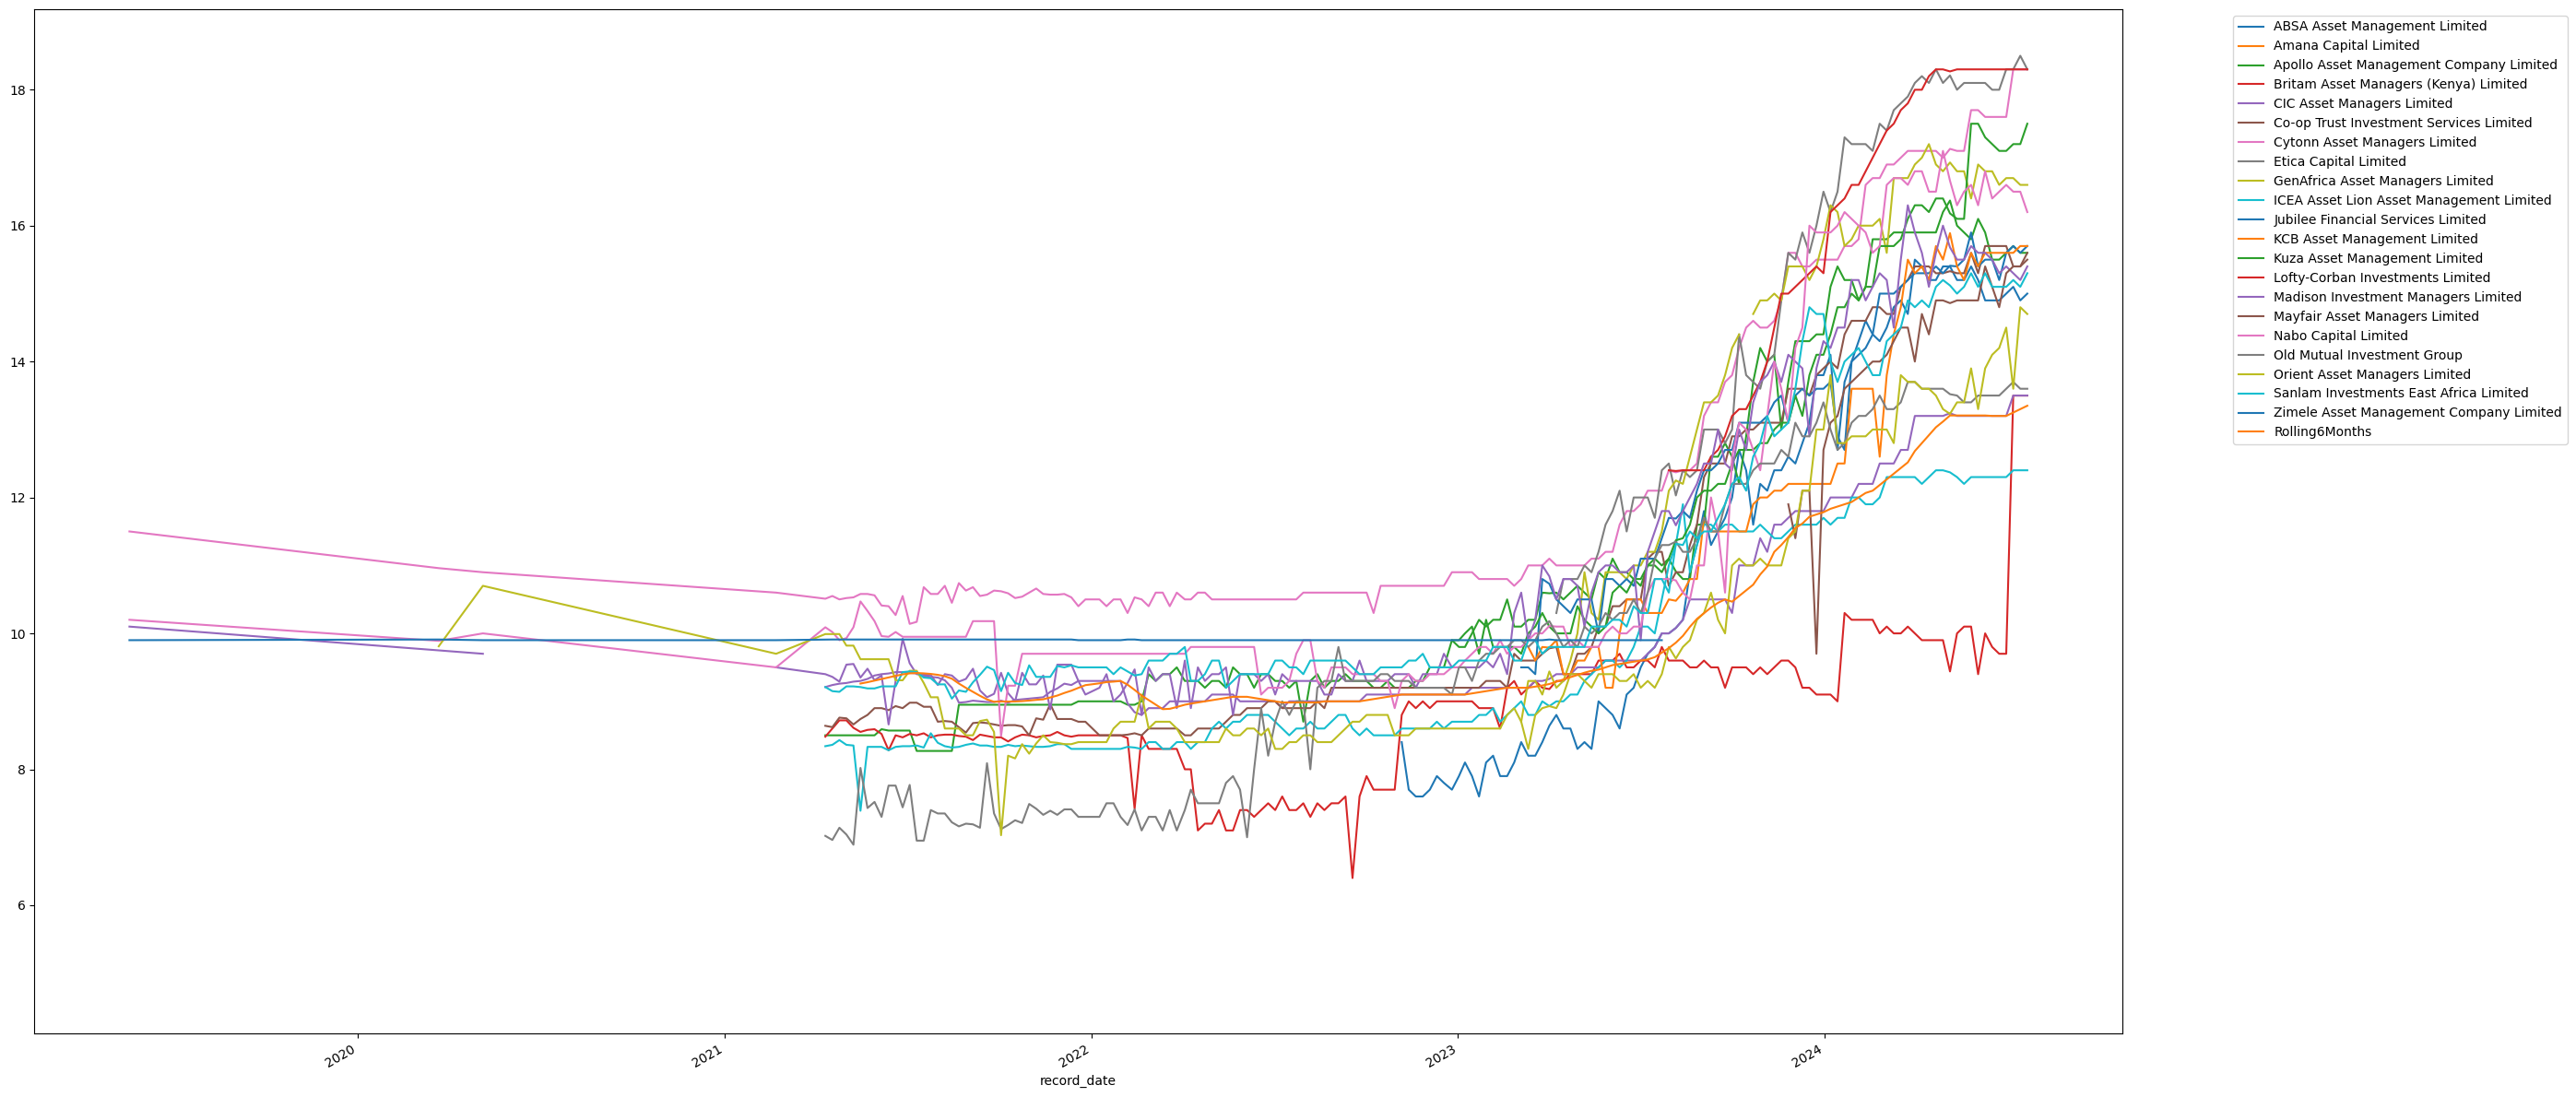

In [79]:
EAR_pivot.plot(figsize=(28, 12))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [86]:
EAR_pivot

fund_manager,ABSA Asset Management Limited,Amana Capital Limited,Apollo Asset Management Company Limited,Britam Asset Managers (Kenya) Limited,CIC Asset Managers Limited,Co-op Trust Investment Services Limited,Cytonn Asset Managers Limited,Etica Capital Limited,GenAfrica Asset Managers Limited,ICEA Asset Lion Asset Management Limited,...,Kuza Asset Management Limited,Lofty-Corban Investments Limited,Madison Investment Managers Limited,Mayfair Asset Managers Limited,Nabo Capital Limited,Old Mutual Investment Group,Orient Asset Managers Limited,Sanlam Investments East Africa Limited,Zimele Asset Management Company Limited,Rolling6Months
record_date,,,,,,,,,,,,,,,,,,,,,
2019-05-19,NaN,NaN,NaN,NaN,10.10,NaN,11.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.20,NaN,NaN,NaN,9.90,NaN
2020-03-22,NaN,8.2,8.72,8.32,9.75,8.85,10.96,NaN,NaN,8.19,...,NaN,NaN,9.54,NaN,9.89,4.80,9.81,9.67,9.91,NaN
2020-05-05,NaN,NaN,NaN,NaN,9.70,NaN,10.90,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.00,NaN,10.70,NaN,9.90,NaN
2021-02-21,NaN,NaN,NaN,NaN,NaN,NaN,10.60,NaN,NaN,NaN,...,NaN,NaN,9.50,NaN,9.50,NaN,9.70,NaN,9.90,NaN
2021-04-11,NaN,NaN,8.50,8.48,9.21,8.64,10.51,NaN,NaN,8.34,...,NaN,NaN,9.40,NaN,10.09,7.02,9.99,9.21,9.91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-23,14.9,NaN,15.50,9.70,13.20,15.70,17.60,18.0,16.6,12.30,...,17.1,18.3,15.30,14.8,16.50,13.50,14.20,15.10,NaN,13.20
2024-06-30,15.0,NaN,15.60,9.70,13.20,15.70,17.60,18.3,16.7,12.30,...,17.1,18.3,15.40,15.3,16.60,13.60,14.50,15.10,NaN,13.20
2024-07-07,15.1,NaN,15.70,13.50,13.50,15.40,18.30,18.3,16.7,12.40,...,17.2,18.3,15.30,15.4,16.50,13.70,13.60,15.20,NaN,13.25


In [94]:
EAR_pivot.index

DatetimeIndex(['2019-05-19', '2020-03-22', '2020-05-05', '2021-02-21',
               '2021-04-11', '2021-04-18', '2021-04-25', '2021-05-02',
               '2021-05-09', '2021-05-16',
               ...
               '2024-05-19', '2024-05-26', '2024-06-02', '2024-06-09',
               '2024-06-16', '2024-06-23', '2024-06-30', '2024-07-07',
               '2024-07-14', '2024-07-21'],
              dtype='datetime64[ns]', name='record_date', length=175, freq=None)

In [100]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'record_date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'value': range(10)
}
df = pd.DataFrame(data)
df.set_index('record_date', inplace=True)

# Reset index to make 'record_date' a column again
df = df.reset_index()

# Plotting with custom hover data format
fig = px.line(df, x='record_date', y='value', labels={'value': 'Value', 'record_date': 'Date'},
              title='Line Chart with Custom Hover Data')

# Customize the hover template
fig.update_traces(hovertemplate='Date: %{x|%Y-%m-%d}<br>Value: %{y}')

fig.show()


In [103]:
df

,record_date,value
0,2023-01-01,0
1,2023-01-02,1
2,2023-01-03,2
3,2023-01-04,3
4,2023-01-05,4
5,2023-01-06,5
6,2023-01-07,6
7,2023-01-08,7
8,2023-01-09,8
9,2023-01-10,9


In [99]:
import plotly.io as pio
import plotly.express as px

pio.renderers.default = "plotly_mimetype+notebook_connected"

EAR_fig = px.line(EAR_pivot, x=EAR_pivot.index, y=EAR_pivot.columns, hover_data={'index': False})
EAR_fig.update_layout(
    # width=800,
    height=800,
    # legend=dict(yanchor="top", y=0.99, xanchor="left", x=1.02),
    margin=dict(t=100),
    title=dict(
        text="Effective Annual Rate",  # Your title here
        y=0.98,                   # Adjust the title's vertical position
        x=0.5,                    # Center the title
        xanchor='center',
        yanchor='top'
    ),
    xaxis=dict(
        side="top",    # This moves the x-axis to the top
        title="Date"   # This sets the title for the x-axis
    ),
    yaxis=dict(
        title="Effective Annual Rate"   # This sets the title for the x-axis
    ),

    legend=dict(
        orientation="h",  # horizontal orientation
        yanchor="bottom",
        y=-4.5,  # move the legend below the plot
        xanchor="center",
        x=0.5
    ))
EAR_fig.show()

ValueError: Value of 'hover_data_0' is not the name of a column in 'data_frame'. Expected one of ['ABSA Asset Management Limited', 'Amana Capital Limited', 'Apollo Asset Management Company Limited', 'Britam Asset Managers (Kenya) Limited', 'CIC Asset Managers Limited', 'Co-op Trust Investment Services Limited', 'Cytonn Asset Managers Limited', 'Etica Capital Limited', 'GenAfrica Asset Managers Limited', 'ICEA Asset Lion Asset Management Limited', 'Jubilee Financial Services Limited', 'KCB Asset Management Limited', 'Kuza Asset Management Limited', 'Lofty-Corban Investments Limited', 'Madison Investment Managers Limited', 'Mayfair Asset Managers Limited', 'Nabo Capital Limited', 'Old Mutual Investment Group', 'Orient Asset Managers Limited', 'Sanlam Investments East Africa Limited', 'Zimele Asset Management Company Limited', 'Rolling6Months'] but received: index
 To use the index, pass it in directly as `df.index`.

In [84]:
start_date = '2022-09-01'
end_date = '2022-09-30'

# Filter the DataFrame
filtered_df = all_cytonn_reports_df[
    (pd.to_datetime(all_cytonn_reports_df['researchdate']) >= start_date) & \
    (pd.to_datetime(all_cytonn_reports_df['researchdate']) <= end_date)
]
list(filtered_df.loc[:,'url'])

['https://cytonnreport.com/research/the-kenyan-national-social-security-fund-nssf-cytonn-weekly-38-2022',
 'https://cytonnreport.com/research/administration-as-a-business-restructuring-option-cytonn-weekly-37-2022',
 'https://cytonnreport.com/research/kenya-listed-banks-h1-2022-report',
 'https://cytonnreport.com/research/cytonn-monthly-august-2022']

In [65]:
all_cytonn_reports_df

,id,slug,name,author,researchdate,active,created_by,series_id,campaign,sent,...,title,category,summary,body,date_holder,date,creator,status,series,topics
0,722,kenya-retail-report,"Kenya Retail Report 2024, & Cytonn Weekly #29/...",Research team,2024-07-21,1,94,1,2317,1,...,"Kenya Retail Report 2024, & Cytonn Weekly #29/...",Investment Reports,"<p><strong>Money Markets, T-Bills Primary Auct...","<p><strong>Money Markets, T-Bills Primary Auct...",21,"21 July, 2024",Chelsea Nyakundi,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 2417, 'name': 'Fixed Income', 'slug': ..."
1,721,special-interest-group,"Special Interest Group Funds in Kenya, & Cyton...",Research Team,2024-07-14,1,97,1,2308,1,...,"Special Interest Group Funds in Kenya, & Cyton...",Investment Reports,<p><strong>Investment Updates:</strong></p>\r\...,<p><strong>Investment Updates:</strong></p>\r\...,14,"14 July, 2024",Ian Kaire,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 2412, 'name': 'Company updates', 'slug..."
2,720,kenyas-fy2024-2025-budget,"Kenya’s FY’2024/2025 Budget Review, & Cytonn W...",Research Team,2024-07-07,1,95,1,2279,1,...,"Kenya’s FY’2024/2025 Budget Review, & Cytonn W...",Investment Reports,"<p><strong>Money Markets, T-Bills Primary Auct...","<p><strong>Money Markets, T-Bills Primary Auct...",7,"7 July, 2024",Fredrick Maore,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 2407, 'name': 'Fixed Income', 'slug': ..."
3,719,cytonn-h12024-markets,Cytonn H1’2024 Markets Review,Research Team,2024-06-30,1,93,1,2258,1,...,Cytonn H1’2024 Markets Review,Investment Reports,<p><strong>Global Economic Growth: </strong></...,<p><strong>Global Economic Growth: </strong></...,30,"30 June, 2024",Erick Kariuki,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 2400, 'name': 'Global Markets Review',..."
4,718,kenya-fy2023-insurance,"Kenya FY’2023 Insurance Report, & Cytonn Weekl...",Research Team,2024-06-23,1,92,1,2243,1,...,"Kenya FY’2023 Insurance Report, & Cytonn Weekl...",Investment Reports,<p><strong>Investment Updates:</strong></p>\r\...,<p><strong>Investment Updates:</strong></p>\r\...,23,"23 June, 2024",Edna Dande,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 2395, 'name': 'Company updates', 'slug..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,4,update-nov-21-2014,Cytonn Weekly Update,Shiv Arora,2014-11-21,1,1,1,None,0,...,Cytonn Weekly Update,Investment Reports,<h3>Kenya Market Update &amp; Outlook?\n</h3>\...,<h3>Kenya Market Update &amp; Outlook?\n</h3>\...,21,"21 November, 2014",Cytonn Research Team,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 4, 'name': 'Cytonn Weekly', 'slug': 'u..."
636,3,update-nov-7-2014,Cytonn Weekly Update,Shiv Arora,2014-11-07,1,1,1,None,0,...,Cytonn Weekly Update,Investment Reports,<h3>Kenya Market Update &amp; Outlook?</h3>\n\...,<h3>Kenya Market Update &amp; Outlook?</h3>\n\...,7,"7 November, 2014",Cytonn Research Team,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 3, 'name': 'Cytonn Weekly', 'slug': 'u..."
637,2,update-oct-24-2014,Cytonn Weekly Update,Shiv Arora,2014-10-24,1,1,1,None,0,...,Cytonn Weekly Update,Investment Reports,<h3>Kenya Market Update &amp; Outlook</h3>\n\n...,<h3>Kenya Market Update &amp; Outlook</h3>\n\n...,24,"24 October, 2014",Cytonn Research Team,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 2, 'name': 'Cytonn Weekly', 'slug': 'u..."
638,1,rebasing-of-kenyas-gdp,Rebasing of Kenya's GDP,Shiv Arora,2014-10-17,1,1,1,None,0,...,Rebasing of Kenya's GDP,Investment Reports,<h3>What happened during Kenya?s rebasing?</h3...,<h3>What happened during Kenya?s rebasing?</h3...,17,"17 October, 2014",Cytonn Research Team,Active,"{'id': 1, 'name': 'Cytonn Weekly', 'descriptio...","[{'id': 1, 'name': 'Cytonn Weekly', 'slug': 'r..."


<hr/>

In [46]:
AUM_df = grouped_df[grouped_df['record_type'] == 'AUM'].drop(columns=['record_type']).copy()
AUM_df['record_date'] = pd.to_datetime(AUM_df['record_date'])
AUM_pivot = AUM_df.pivot(index='record_date', columns='fund_manager', values='record_value')
AUM_pivot['Rolling6Months'] = AUM_pivot['CIC Asset Managers Limited'].rolling(window=6).mean()
AUM_pivot

fund_manager,ABSA Asset Management Limited,Amana Capital Limited,Apollo Asset Management Company Limited,Britam Asset Managers (Kenya) Limited,CIC Asset Managers Limited,Co-op Trust Investment Services Limited,Cytonn Asset Managers Limited,Etica Capital Limited,GenAfrica Asset Managers Limited,ICEA Asset Lion Asset Management Limited,...,Kuza Asset Management Limited,Lofty-Corban Investments Limited,Madison Investment Managers Limited,Mayfair Asset Managers Limited,Nabo Capital Limited,Old Mutual Investment Group,Orient Asset Managers Limited,Sanlam Investments East Africa Limited,Zimele Asset Management Company Limited,Rolling6Months
record_date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NaN,622.6,270.25,7154.766667,23535.5,12.3,305.466667,NaN,NaN,6814.633333,...,NaN,NaN,1451.4,NaN,611.6,5568.95,71.766667,1645.75,934.05,NaN
2019-01-02,NaN,622.6,270.25,7154.766667,23535.5,12.3,305.466667,NaN,NaN,6814.633333,...,NaN,NaN,1451.4,NaN,611.6,5568.95,71.766667,1645.75,934.05,NaN
2019-01-03,NaN,622.6,270.25,7154.766667,23535.5,12.3,305.466667,NaN,NaN,6814.633333,...,NaN,NaN,1451.4,NaN,611.6,5568.95,71.766667,1645.75,934.05,NaN
2019-01-04,NaN,622.6,270.25,7154.766667,23535.5,12.3,305.466667,NaN,NaN,6814.633333,...,NaN,NaN,1451.4,NaN,611.6,5568.95,71.766667,1645.75,934.05,NaN
2019-01-05,NaN,622.6,270.25,7154.766667,23535.5,12.3,305.466667,NaN,NaN,6814.633333,...,NaN,NaN,1451.4,NaN,611.6,5568.95,71.766667,1645.75,934.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,8003.0,25.8,1296.40,30029.500000,61916.2,6038.5,1027.300000,1027.6,757.5,15654.800000,...,297.2,908.8,5934.5,28.0,4707.3,11831.70,262.500000,29699.20,2862.70,61916.2
2024-03-28,8003.0,25.8,1296.40,30029.500000,61916.2,6038.5,1027.300000,1027.6,757.5,15654.800000,...,297.2,908.8,5934.5,28.0,4707.3,11831.70,262.500000,29699.20,2862.70,61916.2
2024-03-29,8003.0,25.8,1296.40,30029.500000,61916.2,6038.5,1027.300000,1027.6,757.5,15654.800000,...,297.2,908.8,5934.5,28.0,4707.3,11831.70,262.500000,29699.20,2862.70,61916.2


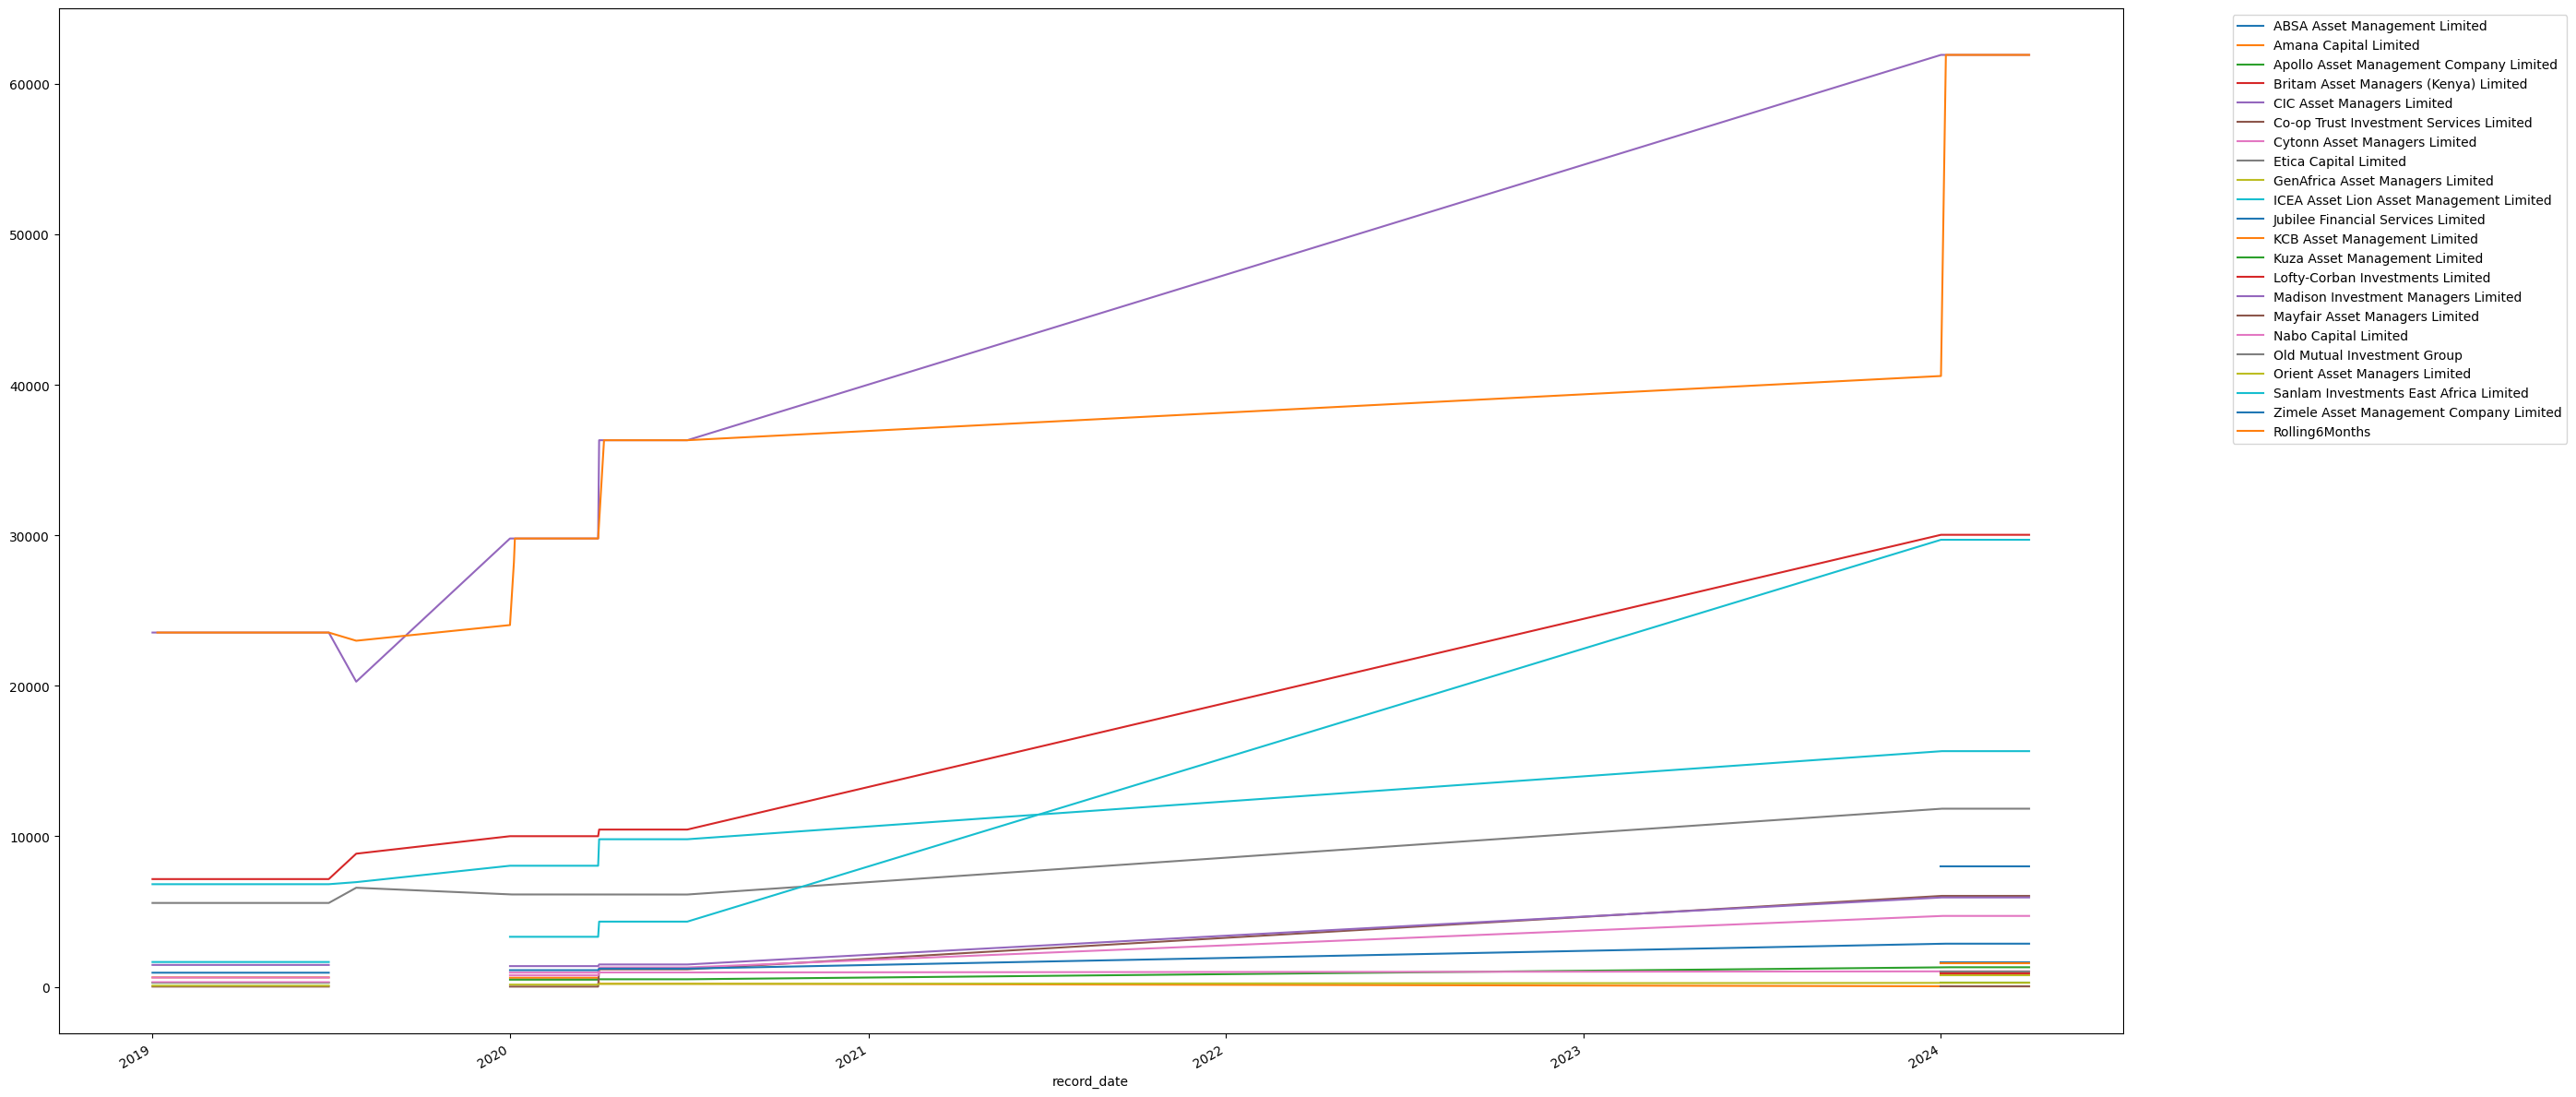

In [47]:
AUM_pivot.plot(figsize=(28, 12))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.io as pio
import plotly.express as px

pio.renderers.default = "plotly_mimetype+notebook_connected"

fig = px.line(AUM_pivot, x=AUM_pivot.index, y=AUM_pivot.columns)
fig.update_layout(
    # width=800,
    height=800,
    # legend=dict(yanchor="top", y=0.99, xanchor="left", x=1.02),
    margin=dict(t=100),
    title=dict(
        text="Time Series Data",  # Your title here
        y=0.98,                   # Adjust the title's vertical position
        x=0.5,                    # Center the title
        xanchor='center',
        yanchor='top'
    ),
    xaxis=dict(
        side="top",    # This moves the x-axis to the top
        title="Date"   # This sets the title for the x-axis
    ),
    yaxis=dict(
        title="Assets Under Management"   # This sets the title for the x-axis
    ),

    legend=dict(
        orientation="h",  # horizontal orientation
        yanchor="bottom",
        y=-4.5,  # move the legend below the plot
        xanchor="center",
        x=0.5
    ))
fig.show()

<hr/>

In [ ]:
def topics_tables_predicate(row: pd.Series):
    html = ' '.join([topic.get('body') for topic in row['topics']])
    parsed_html = BeautifulSoup(html, "html.parser")
    tables: list[Tag] = [table for table in parsed_html.find_all('table')]
    tables_str_value = ' '.join(str(table) for table in tables).lower()
    unwanted_regexes = ['cic\s*group', 'cic\s*insurance', 'cic\s*academia']
    for unwanted_regex in unwanted_regexes:
        tables_str_value = re.sub(unwanted_regex, "", tables_str_value, flags=re.IGNORECASE)
    return 'cic' in tables_str_value

matched_records = []
for index, record in tqdm(all_cytonn_reports_df.iterrows(), total=len(all_cytonn_reports_df)):
    raw_and_extracted_dataframes = extract_table_by_column_names(record)
    extracts = list(raw_and_extracted_dataframes)
    is_topics_match = topics_tables_predicate(record)
    matched_records.append((index, len(extracts), is_topics_match))

In [ ]:
indexes_with_cic = [index for index, tables, is_topics_match in matched_records if tables == 0 and is_topics_match]
indexes_with_cic

<hr/>

In [ ]:
len(indexes_with_cic)

In [ ]:
webbrowser.get("/usr/bin/google-chrome %s")
for index in indexes_with_cic[20:]:
    url = str(all_cytonn_reports_df.loc[index, 'url'])
    webbrowser.open(url)

In [ ]:
row = all_cytonn_reports_df.loc[
    all_cytonn_reports_df['url'] == 'https://cytonnreport.com/research/unit-trust-fund-performance-q3-1'
].iloc[0]
dfs = extract_table_by_column_names(row)

In [ ]:
dfs[0]

<hr/>

In [ ]:
row = all_cytonn_reports_df.loc[
    all_cytonn_reports_df['url'] == 'https://cytonnreport.com/research/q1-2024-unit-trust-funds-performance-note'
].iloc[0]
table_columns_list = [
    (
        [ 'No.', 'Collective Investment Schemes', "FY’2023 AUM", "FY’2023", "Q1'2024 AUM", "Q1’2024", 'AUM Growth'], 
        [
            # https://cytonnreport.com/research/q1-2024-unit-trust-funds-performance-note
            lambda row, _: RecordInfo("AUM", 'FY’2023', row["FY’2023 AUM"], row['Collective Investment Schemes']),
            lambda row, _: RecordInfo("AUM", 'Q1’2024', row["Q1'2024 AUM"], row['Collective Investment Schemes'])
        ]
    ),
]
dfs = extract_table_by_column_names(row)

In [ ]:
one = next(dfs)

In [ ]:
one[1]